# Support Vector Machine

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonliner classification, regression, and even outlier detection. In this notebook, we will discover the support vector machine algorithm as well as it implementation in scikit-learn. We will also discover the Principal Component Analysis and its implementation with scikit-learn.

# 1. Support Vector Machine — (SVM)

Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

## 1. 1. What is Support Vector Machine?
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

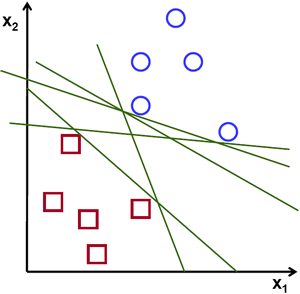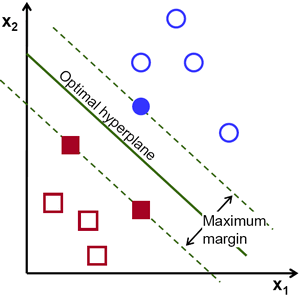

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

## 1. 2. Hyperplanes and Support Vectors

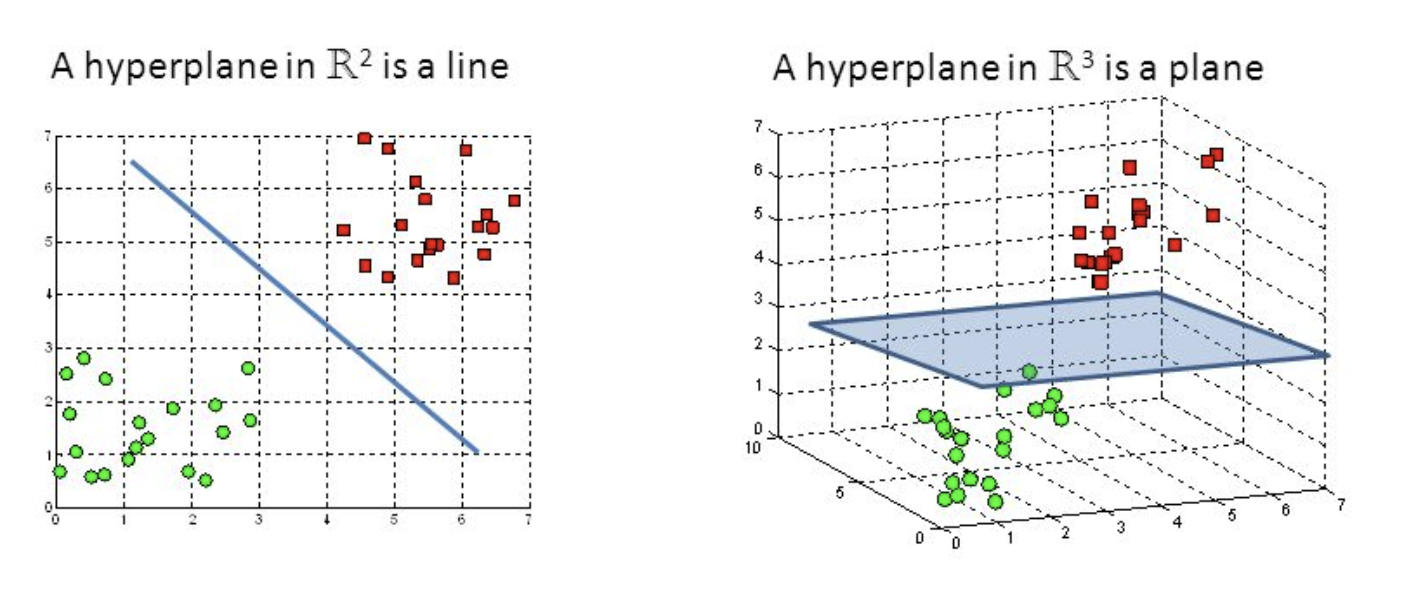
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

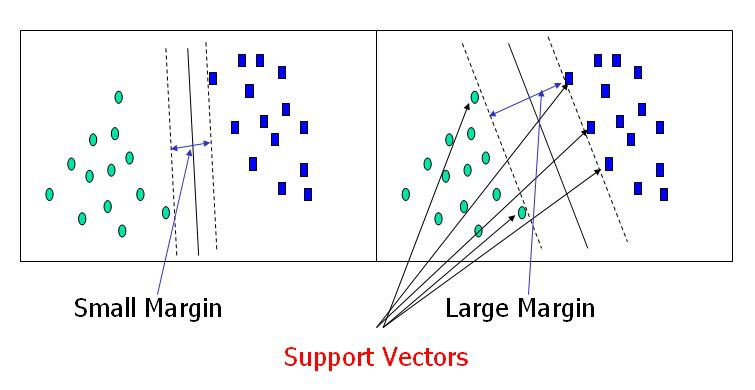

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

## 1. 3. Large Margin Intuition
In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

# 2. SVM Implementation in Python

We will use support vector machine in Predicting if the cancer diagnosis is benign or malignant based on several observations/features.

- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [35]:
print(cancer.target_names)

['malignant' 'benign']


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. 1. VISUALIZING THE DATA

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

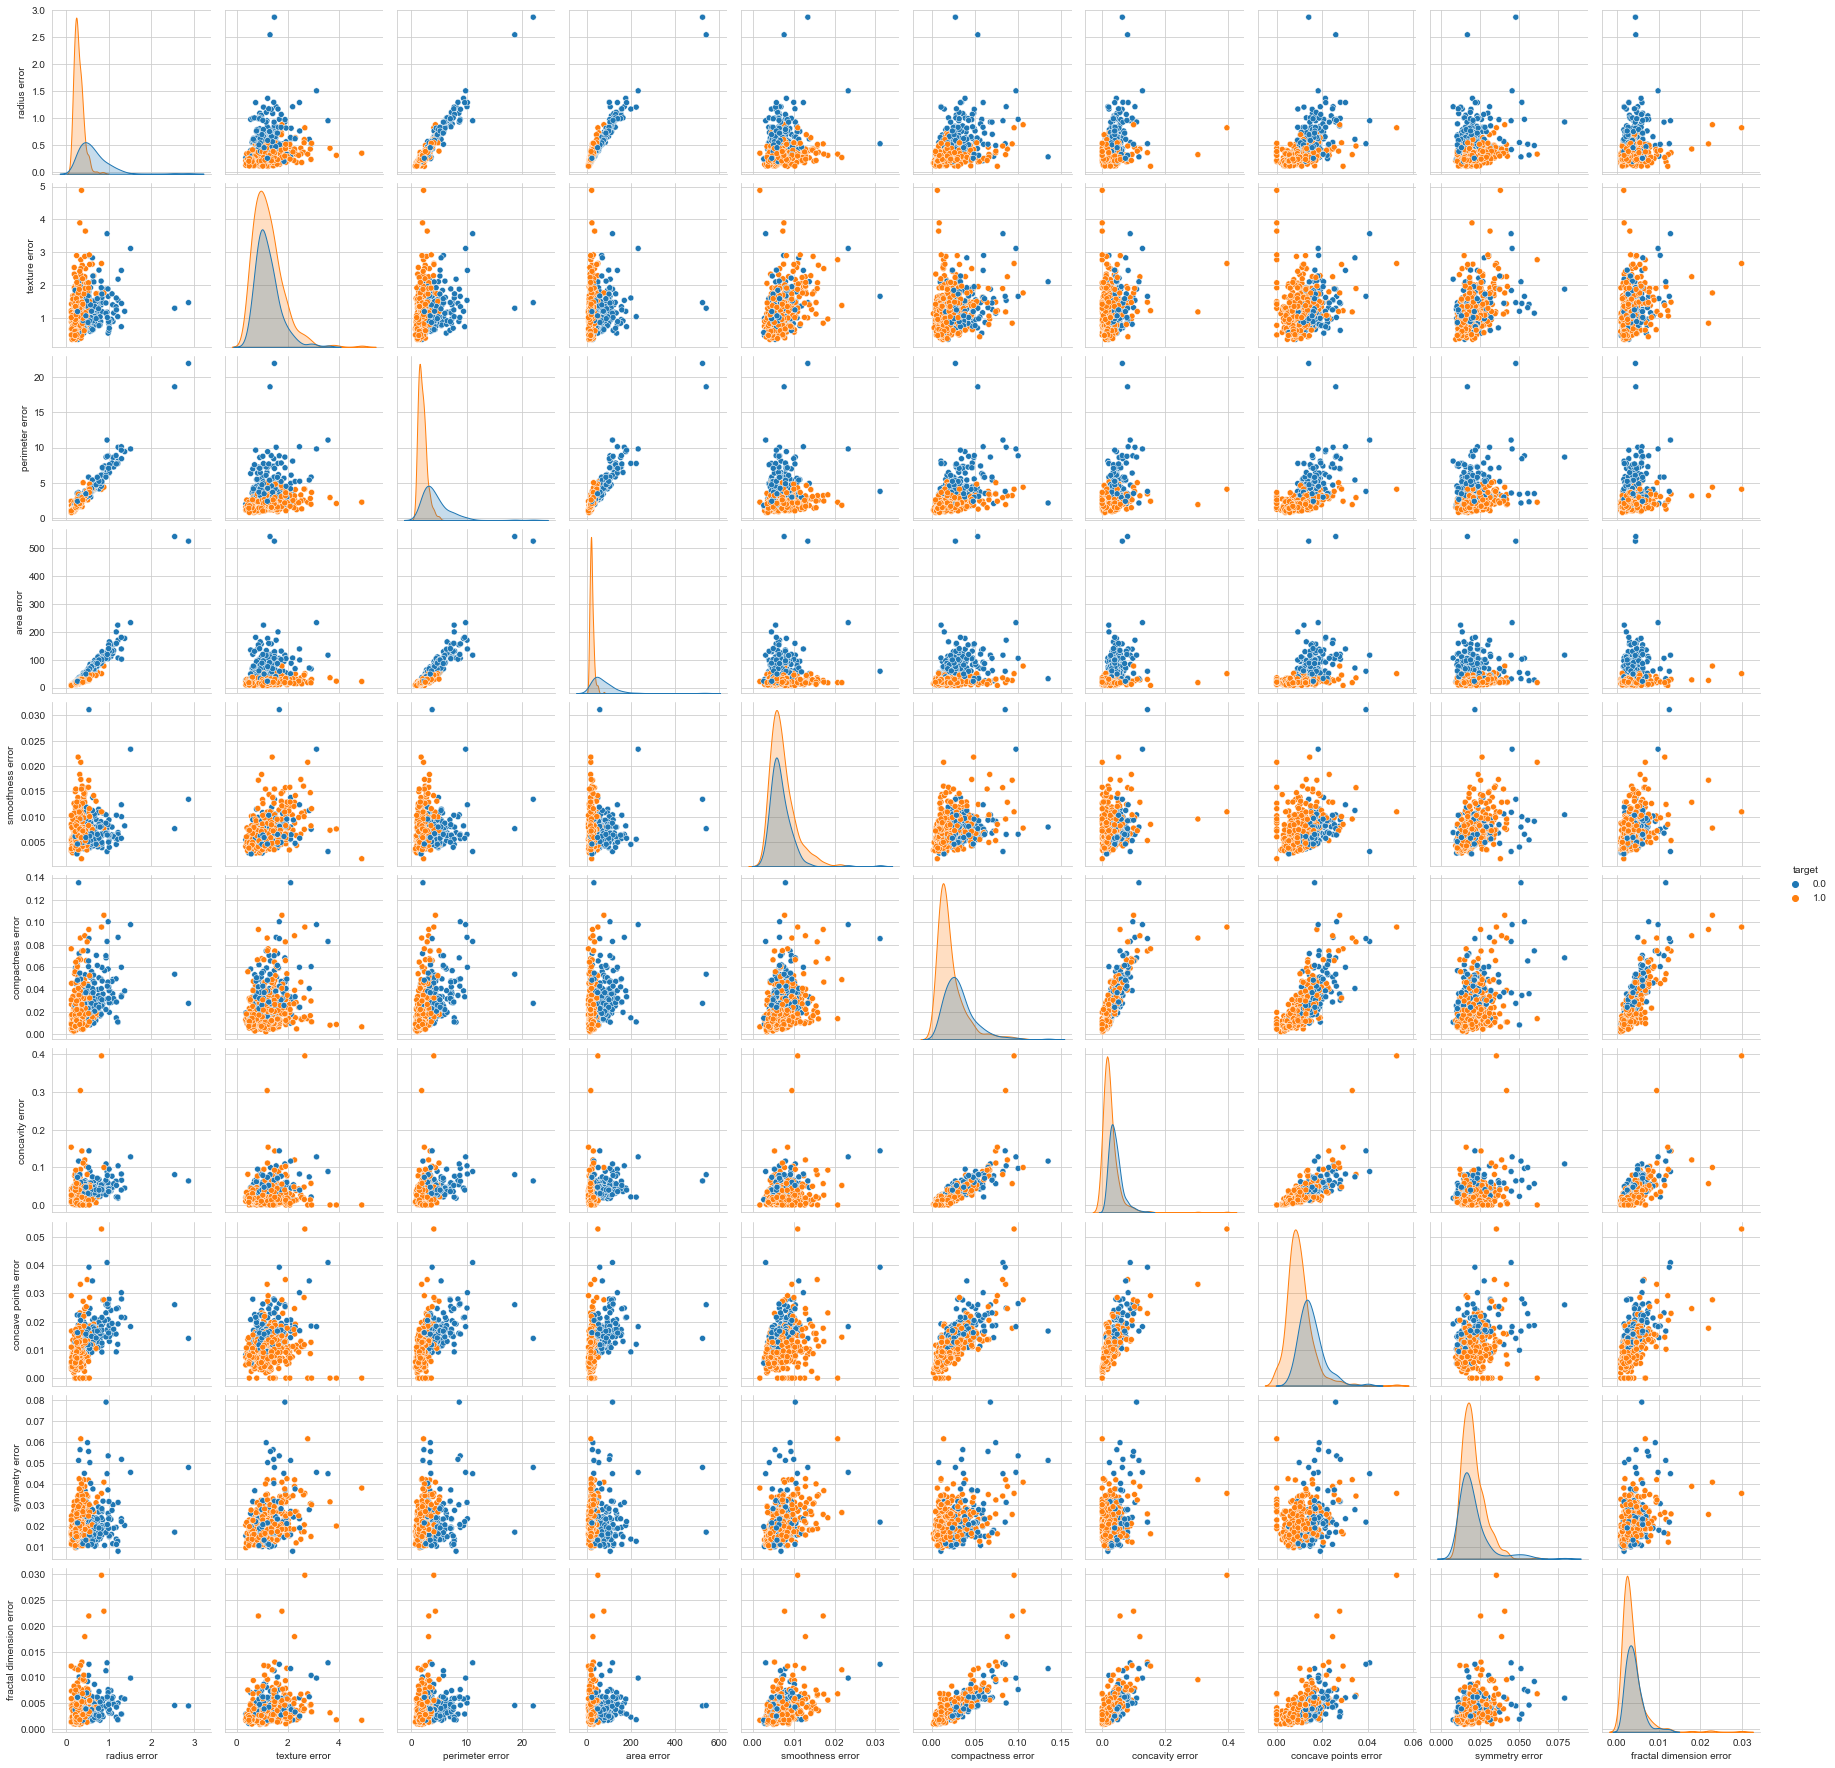

In [5]:
sns.pairplot(df, hue='target', vars=['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'])

C:\Users\siluj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

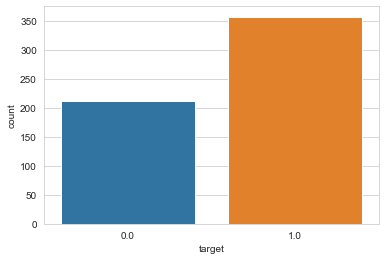

In [6]:
sns.countplot(df['target'], label = "Count")

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

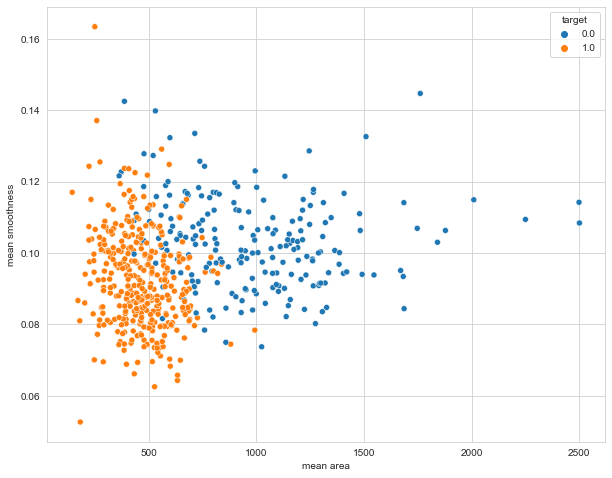

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

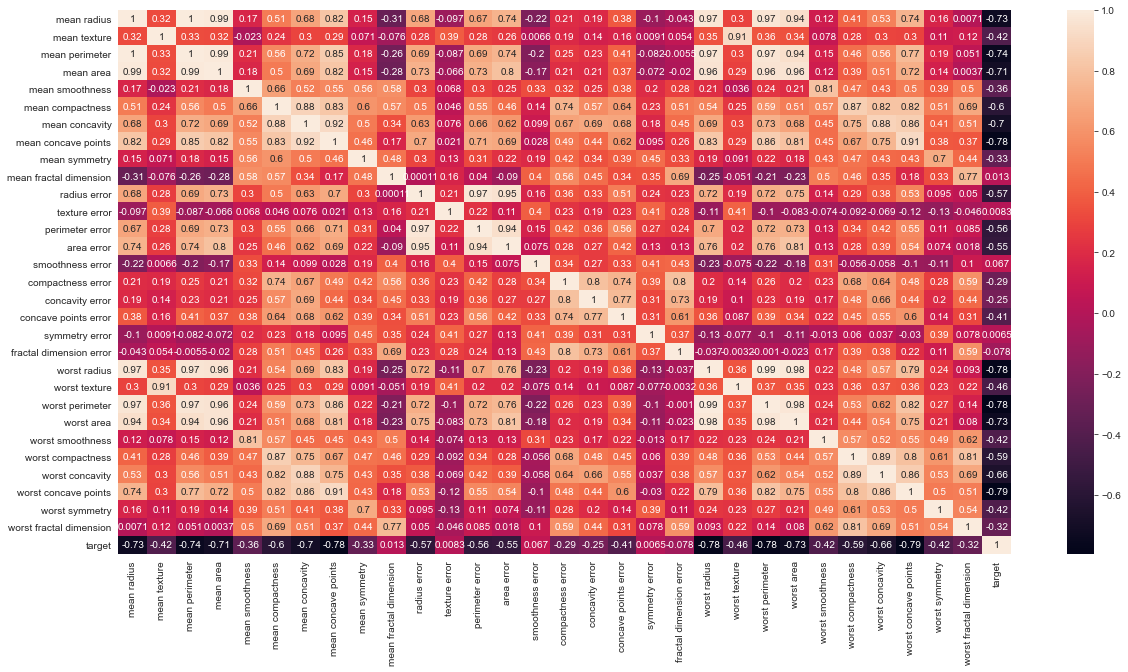

In [42]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

## 2. 2. MODEL TRAINING (FINDING A PROBLEM SOLUTION)

In [43]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

'X' shape: (569, 30)
'y' shape: (569,)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 2. 3. Support Vector Machines (Kernels)

- `C parameter`: Controlls trade-off between classifying training points correctly and having a smooth decision boundary.
    - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    - Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over it.
- `gamma parameter`: Controlls how far the influence of a single training set reaches.
    - Large gamma: close reach (closer data points have high weight)
    - Small gamma: far reach (more generalized solution)
- `degree parameter` : Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.

A common approach to find the right hyperparameter values is to use grid search. It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sence of the what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.
****
### 2. 3. 1. Linear Kernel SVM

In [45]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual = True,random_state = 24)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.43%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.968504    0.919732  0.934272    0.944118      0.936562
recall       0.836735    0.985663  0.934272    0.911199      0.934272
f1-score     0.897810    0.951557  0.934272    0.924684      0.933011
support    147.000000  279.000000  0.934272  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[123  24]
 [  4 275]]

Test Result:
Accuracy Score: 93.71%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.896552  0.937063    0.948276      0.943574
recall      0.861538   1.000000  0.937063    0.930769      0.937063
f1-score    0.925620   0.945455  0.937063    0.935537      0.936439
support    65.000000  78.000000  0.937063  143.000000    143.000000
___

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### 2. 3. 2. Polynomial Kernel SVM

This code trains a SVM classifier using 2rd degree ploynomial kernel.

In [46]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=1000)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.48%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.958333    0.968085  0.964789    0.963209      0.964720
recall       0.938776    0.978495  0.964789    0.958635      0.964789
f1-score     0.948454    0.973262  0.964789    0.960858      0.964701
support    147.000000  279.000000  0.964789  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[138   9]
 [  6 273]]

Test Result:
Accuracy Score: 95.10%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.967742   0.938272  0.951049    0.953007      0.951667
recall      0.923077   0.974359  0.951049    0.948718      0.951049
f1-score    0.944882   0.955975  0.951049    0.950428      0.950933
support    65.000000  78.000000  0.951049  143.000000    143.000000
___

### 2. 3. 3. Radial Kernel SVM
Just like the polynomial features method, the similarity features can be useful with any 

In [47]:
model = SVC(kernel='rbf',C=1,gamma=.000001)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.78%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.966667    0.898693   0.91784    0.932680      0.922149
recall       0.789116    0.985663   0.91784    0.887389      0.917840
f1-score     0.868914    0.940171   0.91784    0.904542      0.915582
support    147.000000  279.000000   0.91784  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[116  31]
 [  4 275]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.982143   0.885057  0.923077    0.933600      0.929187
recall      0.846154   0.987179  0.923077    0.916667      0.923077
f1-score    0.909091   0.933333  0.923077    0.921212      0.922314
support    65.000000  78.000000  0.923077  143.000000    143.000000
___

Other kernels exist but are not used much more rarely. For example, some kernels are specialized for specific data structures. string kernels are sometimes used when classifying text document on DNA sequences.

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first, especially if the training set is very large or if it has plenty of features. If the training se is not too large, you should try the Gaussian RBF kernel as well. 

## 2. 4. Data Preparation for SVM
This section lists some suggestions for how to best prepare your training data when learning an SVM model.

- **Numerical Inputs:** SVM assumes that your inputs are numeric. If you have categorical inputs you may need to covert them to binary dummy variables (one variable for each category).
- **Binary Classification:** Basic SVM as described in this post is intended for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

In [48]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [49]:
X_train

array([[ 2.22069131,  0.71048166,  2.16424824, ...,  1.75711022,
        -1.33757197, -0.66400274],
       [-0.73893284, -0.46179845, -0.72502989, ..., -0.72806389,
        -0.49209595, -0.12301026],
       [ 0.77155648,  2.02352768,  0.73947983, ...,  0.49859458,
        -1.08263836, -0.2752161 ],
       ...,
       [ 1.40555297,  0.48894841,  1.35673855, ...,  1.49215956,
         1.27469077,  0.85529824],
       [ 2.03370617,  1.33354392,  2.20652624, ...,  2.27124067,
         0.06456288,  0.85695265],
       [-0.16336921,  0.27895335, -0.09170553, ...,  1.49689082,
         1.12302141,  1.52809214]])

In [50]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
Accuracy Score: 98.36%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.992958    0.978873  0.983568    0.985915      0.983733
recall       0.959184    0.996416  0.983568    0.977800      0.983568
f1-score     0.975779    0.987567  0.983568    0.981673      0.983499
support    147.000000  279.000000  0.983568  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[141   6]
 [  1 278]]

Test Result:
Accuracy Score: 99.30%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.987342  0.993007    0.993671      0.993096
recall      0.984615   1.000000  0.993007    0.992308      0.993007
f1-score    0.992248   0.993631  0.993007    0.992939      0.993002
supp

# 3. Support Vector Machine Hyperparameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001,.0001,.00001], 
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True,n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s


Best params: {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 97.18%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.958763  0.971831    0.979381      0.972993
recall       0.918367    1.000000  0.971831    0.959184      0.971831
f1-score     0.957447    0.978947  0.971831    0.968197      0.971528
support    147.000000  279.000000  0.971831  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[135  12]
 [  0 279]]

Test Result:
Accuracy Score: 94.41%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.967213   0.926829  0.944056    0.947021      0.945186
recall      0.907692   0.974359  0.944056    0.941026      0.944056
f1-score    0.936508   0.950000  0.944056    0.943254      0.943867
support    65.0

[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:    2.6s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [52]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## 4. 1. PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [53]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [65]:
pca.explained_variance_ratio_

array([0.4316748 , 0.19845652, 0.09733159, 0.06531574, 0.05212151,
       0.0419896 , 0.02263461])

Text(0, 0.5, 'Second Principal Component')

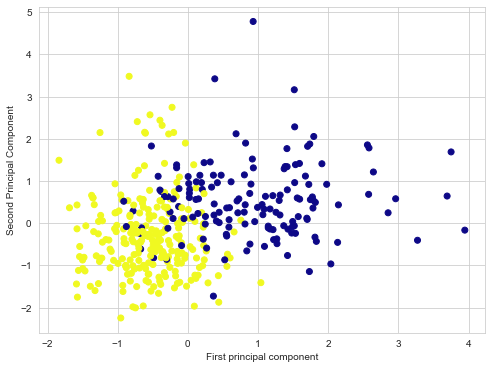

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [67]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)
grid.fit(X_train_pca, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train_pca, y_train)

print_score(svm_clf, X_train_pca, y_train, X_test_pca, y_test, train=True)
print_score(svm_clf, X_train_pca, y_train, X_test_pca, y_test, train=False)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 96.73%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.992754    0.953846  0.967337    0.973300      0.968412
recall       0.919463    0.995984  0.967337    0.957724      0.967337
f1-score     0.954704    0.974460  0.967337    0.964582      0.967064
support    149.000000  249.000000  0.967337  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[137  12]
 [  1 248]]

Test Result:
Accuracy Score: 98.83%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   1.000000    0.981818  0.988304    0.990909      0.988517
recall      0.968254    1.000000  0.988304    0.984127      0.988304
f1-score    0.983871    0.990826  0.988304    0.987348      0.988263
support    

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    8.0s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
